In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd


In [90]:
df = pd.read_csv('../unsupervised_learning_challenge/crypto_data.csv')
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [91]:
is_trading = df.loc[df['IsTrading'] == True]
is_trading['IsTrading'].value_counts()

True    1144
Name: IsTrading, dtype: int64

In [92]:
df = is_trading.drop('IsTrading', axis=1)
df.head()

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0


In [93]:
df = df.dropna(how = 'any')
df.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       685 non-null    object 
 1   CoinName         685 non-null    object 
 2   Algorithm        685 non-null    object 
 3   ProofType        685 non-null    object 
 4   TotalCoinsMined  685 non-null    float64
 5   TotalCoinSupply  685 non-null    object 
dtypes: float64(1), object(5)
memory usage: 37.5+ KB


In [94]:
mined = df.loc[df['TotalCoinsMined'] > 0]
mined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1247
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       532 non-null    object 
 1   CoinName         532 non-null    object 
 2   Algorithm        532 non-null    object 
 3   ProofType        532 non-null    object 
 4   TotalCoinsMined  532 non-null    float64
 5   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(5)
memory usage: 29.1+ KB


In [95]:
df = mined.drop('CoinName', axis=1)
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [96]:
df = pd.get_dummies(data=df, columns=['Algorithm','ProofType'])
df.shape

(532, 98)

In [97]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled.shape

(532, 98)

In [98]:
pca = PCA(n_components=.9)
components = pca.fit_transform(df_scaled)
components.shape


(532, 74)

In [99]:
x_embedded = TSNE().fit_transform(components)
x_embedded.shape


(532, 2)

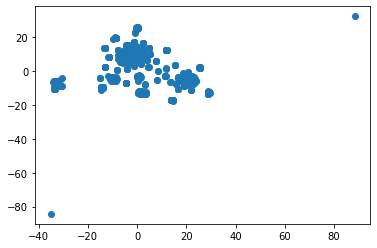

In [100]:
plt.scatter(x_embedded[:,0], x_embedded[:,1])
plt.show()

<AxesSubplot:xlabel='k'>

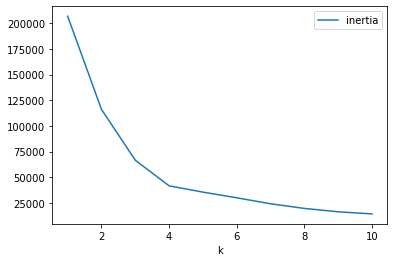

In [102]:
inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(x_embedded)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()
df_elbow.plot(x='k',y='inertia')

In [103]:
def get_clusters(k, data):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(data)
    predictions = model.predict(data)
    data["class"] = model.labels_
    return data

clusters = get_clusters(3,x_embedded)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices